# Project: From Model to Production


**Task 2: Image classification for a refund department (spotlight: Batch processing)**

Author: James Antony Das

## Importing the necessary libraries

In [2]:
# loading the necessary datasets
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Import the models and dataset
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier

# Import the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [13]:
# Load the dataset
print("Loading FashionMNIST dataset")
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Loading FashionMNIST dataset


In [4]:
# dimensions of the datasets
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

Train Shape: (60000, 28, 28) (60000,)
Test Shape: (10000, 28, 28) (10000,)


In [5]:
# The class names
class_names = [
    "T-shirt/top", "Trouser",
    "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker",
    "Bag", "Ankle boot"
]

## Data Preprocessing

In [6]:
# Normalize pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to (28, 28, 1)
X_train = X_train.reshape((60000, 28, 28, 1)).astype("float32")
X_test = X_test.reshape((10000, 28, 28, 1)).astype("float32")

## Building the CNN model

In [6]:
# Check if GPU is available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Using CPU')
else:
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Build the Model
model = models.Sequential([
    # convolution layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # convolution layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # convolution layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    # dense layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    # 10 classes
    layers.Dense(10, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# fitting the model
history = model.fit(X_train, y_train,
                        epochs=100,
                        validation_split=0.1,
                        batch_size=128,
                        callbacks=[early_stopping])

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6381 - loss: 1.0126 - val_accuracy: 0.8405 - val_loss: 0.4271
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8410 - loss: 0.4363 - val_accuracy: 0.8710 - val_loss: 0.3486
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8716 - loss: 0.3559 - val_accuracy: 0.8885 - val_loss: 0.3051
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8853 - loss: 0.3177 - val_accuracy: 0.8973 - val_loss: 0.2819
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8932 - loss: 0.2913 - val_accuracy: 0.8953 - val_loss: 0.2814
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8998 - loss: 0.2741 - val_accuracy: 0.9008 - val_loss: 0.2726
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9061 - loss: 0.2571 - val_accuracy: 0.9087 - val_loss: 0.2528
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9117 - loss: 0.2423 - val_ac

In [7]:
# load model
model = tf.keras.models.load_model('cnn_model.keras')

In [9]:
# prediction for CNN model
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)

y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [11]:
def print_metrics(y_true, y_pred):
  """function for evaluating the model"""
  print("Accuracy score  :", round(accuracy_score(y_true, y_pred), 4))
  print("Precision score :", round(precision_score(y_true, y_pred, average='weighted'), 4))
  print("Recall score    :", round(recall_score(y_true, y_pred, average='weighted'), 4))
  print("F1 score        :", round(f1_score(y_true, y_pred, average='weighted'), 4))
  return None


In [12]:
print('Evaluating Training set..')
print_metrics(y_train, y_pred_train)
print('\nEvaluating Test set..')
print_metrics(y_test, y_pred_test)

Evaluating Training set..
Accuracy score  : 0.9494
Precision score : 0.9493
Recall score    : 0.9494
F1 score        : 0.9492

Evaluating Test set..
Accuracy score  : 0.9101
Precision score : 0.91
Recall score    : 0.9101
F1 score        : 0.9098


In [13]:
# classification report for CNN on Training set
print(classification_report(y_train, y_pred_train, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.93      0.90      6000
     Trouser       0.99      0.99      0.99      6000
    Pullover       0.92      0.91      0.91      6000
       Dress       0.93      0.96      0.95      6000
        Coat       0.90      0.91      0.90      6000
      Sandal       1.00      0.99      0.99      6000
       Shirt       0.86      0.78      0.82      6000
     Sneaker       0.98      0.98      0.98      6000
         Bag       0.99      0.99      0.99      6000
  Ankle boot       0.98      0.98      0.98      6000

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



In [14]:
# classification report for CNN on Test set
print(classification_report(y_test, y_pred_test, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.86      0.88      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.69      0.73      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [15]:
def plot_confusion_matrix(y_true, y_pred, class_names, color='Blues', title=''):
    """Function for calculating the confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    return None

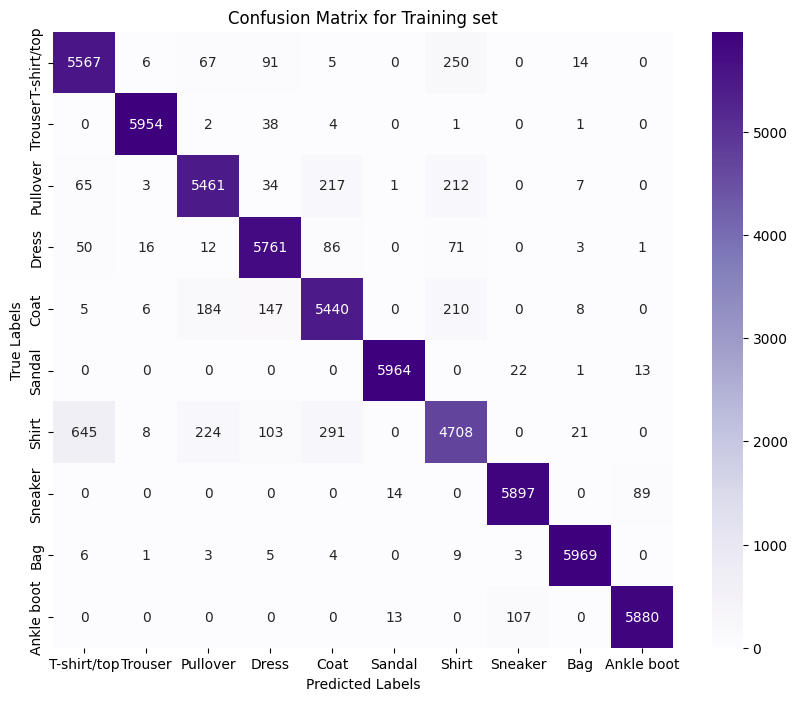

In [16]:
plot_confusion_matrix(y_train, y_pred_train, class_names, color='Purples',
                      title='Confusion Matrix for Training set')

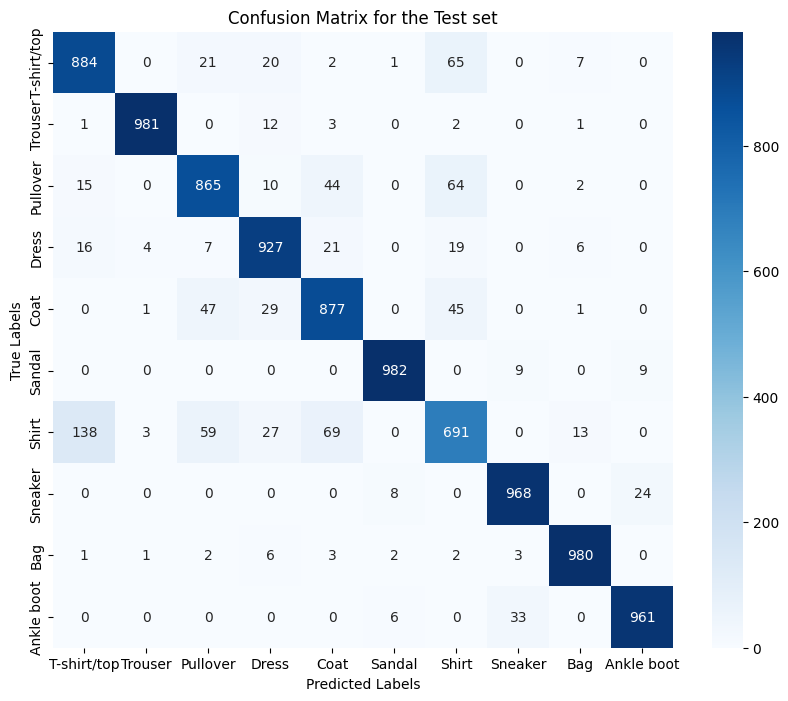

In [17]:
plot_confusion_matrix(y_test, y_pred_test, class_names,
                      title='Confusion Matrix for the Test set')

### Conclusion

* The model is not overfitt on the training set
* The model shows good performance on both trainnig and test set
* The model is 91% accurate
